This project aims to maximize the predictive performance on classify hand-written digits into their respective classes (0-9). The dataset consist of 70000 images, and are of 28x28 pixels. The project will start off with exploratory data analysis, visualizing an average value of each digit based on each pixel depth. Subsequently, data preprocessing and feature selection methods are applied, and several algorithms are tested including logistic, KNN, and SVM ensembles are experimented in an effort to maximize accuracy in this task.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm.autonotebook import tqdm

C:\Users\user\Miniconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [7]:
from scipy import io
from sklearn.model_selection import train_test_split

#this is your downloaded file
data = io.loadmat('mnist-original.mat')

x, y = data['data'].T, data['label'].T
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [3]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 784)
(70000, 1)
(35000, 784)
(35000, 784)
(35000, 1)
(35000, 1)


# Data Preprocessing and Visualization

- Visualize one element from each class 
- Visualize the mean value of each class

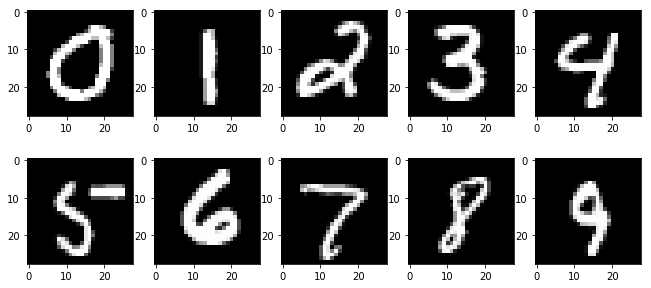

In [69]:
label = range(10)

plt.figure(figsize=(11, 5))

for number in label:
    
    pixel = x_train[np.where(y_train == number)[0]][0].reshape(28,28)
    
    plt.subplot(2,5,number+1)
    plt.imshow(pixel, cmap='gray')
    

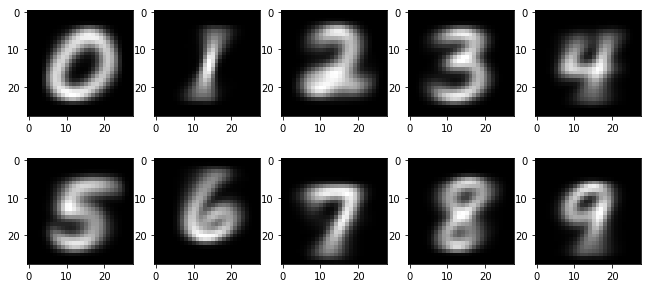

In [5]:
label = range(10)

plt.figure(figsize=(11, 5))

for number in label:
    
    pixel_mean = np.mean(x_train[np.where(y_train == number)[0]], axis=0).reshape(28,28)

    plt.subplot(2,5,number+1)
    plt.imshow(pixel_mean, cmap='gray')

To deal with the large dataset, two methods are applied individually in order to examine how the accuracy changes:
- Reduce the dimensionality (PCA with different hyperparameters are tested)
- Reduce the amount of data points (train test split)

In [6]:
%%timeit 
# Fitting logistic regression to all training data points (50% of total)

logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train, y_train)

print("The classification accuracy is (train): %3.3f" % (logit.score(x_train, y_train)* 100))
print(f'The classification accuracy is (test): {logit.score(x_test, y_test)*100}')

# The classification accuracy is (train): 93.297
# The classification accuracy is (test): 90.67142857142856
# 28.9 s ± 1.71 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 93.180
The classification accuracy is (test): 90.9057142857143


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 93.180
The classification accuracy is (test): 90.9057142857143


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 93.180
The classification accuracy is (test): 90.9057142857143


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 93.180
The classification accuracy is (test): 90.9057142857143


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 93.180
The classification accuracy is (test): 90.9057142857143


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 93.180
The classification accuracy is (test): 90.9057142857143


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 93.180
The classification accuracy is (test): 90.9057142857143


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 93.180
The classification accuracy is (test): 90.9057142857143
26.9 s ± 418 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
# Reduce amount of data points (x_train_2 = 30% instead of 50%)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .5)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_train, y_train, train_size = .6)


logit = LogisticRegression(solver = 'lbfgs')
logit.fit(x_train_2, y_train_2)

print("The classification accuracy is (train): %3.3f" % (logit.score(x_train_2, y_train_2)* 100))
print(f'The classification accuracy is (test): {logit.score(x_test, y_test)*100}')

# The classification accuracy is (train): 94.329
# The classification accuracy is (test): 89.82857142857142
# 18.1 s ± 1.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Conver

The classification accuracy is (train): 94.195
The classification accuracy is (test): 90.04857142857144


C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Conver

The classification accuracy is (train): 94.448
The classification accuracy is (test): 90.11428571428571


C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Conver

The classification accuracy is (train): 94.029
The classification accuracy is (test): 89.82857142857142


C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Conver

The classification accuracy is (train): 94.276
The classification accuracy is (test): 90.13142857142857


C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Conver

The classification accuracy is (train): 94.071
The classification accuracy is (test): 90.08857142857143


C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Conver

The classification accuracy is (train): 94.138
The classification accuracy is (test): 90.03428571428572


C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Conver

The classification accuracy is (train): 94.252
The classification accuracy is (test): 90.08285714285714


C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Conver

The classification accuracy is (train): 93.805
The classification accuracy is (test): 89.83714285714287
16.3 s ± 444 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
# Reduce the dimensionality (trying different components in PCA)

my_pca = PCA(n_components=153)
my_pca.fit(x_train)

x_pca = my_pca.transform(x_train)
x_pca_test = my_pca.transform(x_test)

logit = LogisticRegression(solver='lbfgs')
logit.fit(x_pca, y_train)

print("The classification accuracy is (train): %3.3f" % (logit.score(x_pca, y_train)* 100))
print(f'The classification accuracy is (test): {logit.score(x_pca_test, y_test)*100:.3f}')

# n=2
# The classification accuracy is (train): 43.789
# The classification accuracy is (test): 43.78857142857143
# 2.16 s ± 81.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# n=10
# The classification accuracy is (train): 78.380
# The classification accuracy is (test): 77.48
# 2.7 s ± 129 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# n=25
# The classification accuracy is (train): 87.571
# The classification accuracy is (test): 87.10571428571428
# 3.78 s ± 261 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# n=75
# The classification accuracy is (train): 91.003
# The classification accuracy is (test): 90.49142857142857
# 8.55 s ± 311 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# n = 100
# The classification accuracy is (train): 91.540
# The classification accuracy is (test): 90.686
# 9.56 s ± 367 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# n=150
# The classification accuracy is (train): 91.866
# The classification accuracy is (test): 90.98571428571428
# 11.8 s ± 107 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# n=200
# The classification accuracy is (train): 88.597
# The classification accuracy is (test): 87.571
# 16.2 s ± 712 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# n = 300
# The classification accuracy is (train): 78.189
# The classification accuracy is (test): 76.646
# 20 s ± 426 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.700
The classification accuracy is (test): 91.151


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.689
The classification accuracy is (test): 91.269


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.646
The classification accuracy is (test): 91.183


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.631
The classification accuracy is (test): 91.111


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.643
The classification accuracy is (test): 91.129


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.654
The classification accuracy is (test): 91.163


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.726
The classification accuracy is (test): 91.194


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.677
The classification accuracy is (test): 91.186
11.3 s ± 183 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
# For this particular set of train-test-split, identifying the # of dimensions that will explain 95% of the variance

x_pca_var = PCA(.95)
x_pca_var=x_pca_var.fit(x_train)
print(x_pca_var.n_components_)

my_pca = PCA(n_components=153)
my_pca.fit(x_train)

x_pca = my_pca.transform(x_train)
x_pca_test = my_pca.transform(x_test)

logit = LogisticRegression(solver='lbfgs')
logit.fit(x_pca, y_train)

print("The classification accuracy is (train): %3.3f" % (logit.score(x_pca, y_train)* 100))
print(f'The classification accuracy is (test): {logit.score(x_pca_test, y_test)*100:.3f}')

# n=153 for this particular random split
# The classification accuracy is (train): 92.051
# The classification accuracy is (test): 91.054
# 17.9 s ± 813 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

154


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.734
The classification accuracy is (test): 91.169
154


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.543
The classification accuracy is (test): 91.083
154


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.631
The classification accuracy is (test): 91.131
154


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.677
The classification accuracy is (test): 91.171
154


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.649
The classification accuracy is (test): 91.191
154


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.669
The classification accuracy is (test): 91.177
154


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.683
The classification accuracy is (test): 91.231
154


C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: Convergen

The classification accuracy is (train): 91.669
The classification accuracy is (test): 91.057
15.7 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Due to constraints on computing power, could not run the following code to look at the computing time and accuracy for 
# every dimension

# accuracy=[]

# for k in range(1, len(x_train[0,:])-1):
#     my_pca = PCA(n_components=k)
#     my_pca.fit(x_train)

#     x_pca = my_pca.transform(x_train)
    
#     logit = LogisticRegression(solver='lbfgs')
#     logit.fit(x_pca, y_train)
    
#     accuracy.append(logit.score(x_pca, y_test))

Using k-fold cross-validation for various values of k (try k from 1 to 15) with a KNN classifier and Decision Trees to find the ideal number of neighbors (or tree depths) to model the data.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Subsetting data to 10% due to constraints on computation power 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .5)
x_validate, x_test_1, y_validate, y_test_1 = train_test_split(x_train, y_train, train_size = .2)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
# Use k-fold cross-validation for various values of k (try k from 1 to 15) with a KNN classifier to find the ideal 
# number of neighbors to model the data.

validation_score_list_bestk = []

sample_range_bestk = [1, 3, 5, 10, 15]

for k in tqdm(sample_range_bestk): 
    KNN = KNeighborsClassifier(k)
    validation_score = cross_val_score(KNN, x_validate, y_validate, cv = 5)
    validation_score_list_bestk.append(validation_score)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

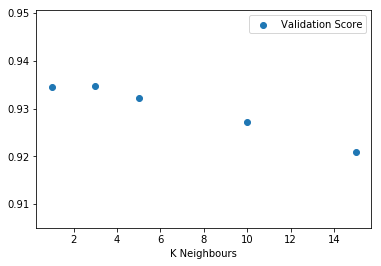

In [13]:
validation_score_mean_bestk = np.mean(validation_score_list_bestk, axis=1)
plt.scatter(sample_range_bestk, validation_score_mean_bestk, label="Validation Score")
plt.legend()
plt.xlabel('K Neighbours')
plt.show();

In [17]:
# k that gives the highest validation score
index_bestk = np.argmax(validation_score_mean_bestk)
bestk_value = sample_range_bestk[index_bestk]
print(f'Index: {index_bestk}, Best K Value: {bestk_value}, Validation Score: {max(validation_score_mean_bestk)*100:.3f}')

Index: 1, Best K Value: 3, Validation Score: 93.472


In [18]:
# What happens to train and validation set accuracy if you set the K in your K-NN model to 1 (1-Nearest Neighbours) 
# or to the number of training points (60000-Nearest Neighbours).

validation_score_list_k_range = []

cv = 5
sample_range = [1, int(len(x_validate)*(cv-1)/cv)-5]

for k in tqdm(sample_range): 
    KNN = KNeighborsClassifier(k)
    validation_score = cross_val_score(KNN, x_validate, y_validate, cv=cv)
    
    validation_score_list_k_range.append(validation_score)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

In [19]:
print(sample_range)
print(np.mean(validation_score_list_k_range, axis=1))

[1, 5595]
[0.93457657 0.10785743]


In [20]:
# Answer the previous question again but using decision trees where instead of controlling for K we control for 
#the depth of the tree.

validation_score_list_DT = []

sample_range_DT = np.arange(10, 160, 10)

for k in tqdm(sample_range_DT): 
    DT_model = DecisionTreeClassifier(max_depth=k)
    validation_score = cross_val_score(DT_model, x_validate, y_validate, cv = 5)
    validation_score_list_DT.append(validation_score)

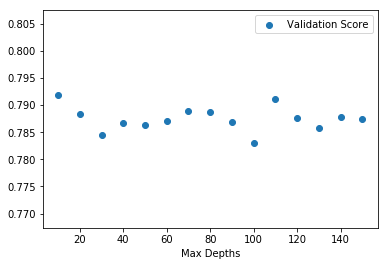

In [22]:
validation_score_mean_DT = np.mean(validation_score_list_DT, axis=1)
plt.scatter(sample_range_DT, validation_score_mean_DT, label="Validation Score")
plt.legend()
plt.xlabel('Max Depths')
plt.show()

In [24]:
index_DT = np.argmax(validation_score_mean_DT)
best_depth_value = sample_range_DT[index_DT]
print(f'Index: {index_DT}, Best Depths Value: {best_depth_value}, Validation Score: {max(validation_score_mean_DT)*100:.3f}')

Index: 0, Best Depths Value: 10, Validation Score: 79.186


# Model

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .5)
x_validate, x_test_1, y_validate, y_test_1 = train_test_split(x_train, y_train, train_size = .5)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:
# Fitting on 25% of the training data, each label of number will have .25(70000)/10 = 1750 examples used to produce
# 'best model'

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.svm import SVC

# Automatic Hyperparameter optimisation
SVC_model = GridSearchCV(
    SVC(),
    param_grid={
        'C': np.logspace(-4, 2, 5),
        'kernel': ['linear', 'rbf']
    },
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    cv=5,
    verbose=6
)
SVC_model.fit(x_validate, y_validate)

print("val. score: %s" % SVC_model.best_score_)

# validation score on first run: 0.9630285714285715 (ran 2h)
# due to computation power, time constraints (Jupyter Notebook techinical issues), didn't rerun with the same parameters

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed: 19.0min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 24.0min finished
C:\Users\user\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


val. score: 0.9092


In [86]:
print(SVC_model.best_params_)

{'C': 0.0001, 'kernel': 'linear'}


In [88]:
# Parameters for SVC model

SVC_model.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-04, 3.16228e-03, 1.00000e-01, 3.16228e+00, 1.00000e+02]), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=6)>

In [1]:
from sklearn.externals import joblib

In [73]:
joblib.dump(SVC_model, 'SVC_model_Hannah.pkl')

In [82]:
y_pred1 = SVC_model.predict(x_test)

Text(0.5, 51.0, 'Predicted y')

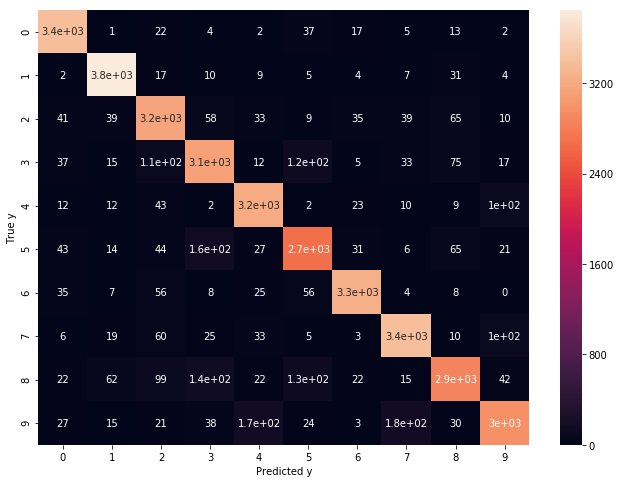

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cnf=confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(11, 8))
sns.heatmap(cnf, annot = True)
plt.ylabel('True y')
plt.xlabel('Predicted y')

In [89]:
# Accuracy Score
SVC_model.score(x_test, y_test)

0.9114285714285715

In [24]:
pixel4 = x_train[np.where(y_train == 4)[0]]
pixel9 = x_train[np.where(y_train==9)[0]]
pixel49 = np.concatenate((pixel4, pixel9), axis=0)

num4 = y_train[np.where(y_train==4)]
num9 = y_train[np.where(y_train==9)]
num49 = np.concatenate((num4, num9), axis=0)

In [25]:
pixel49_x_train, pixel49_x_test, num49_train, num49_test = train_test_split(pixel49, num49, train_size=0.7)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
print(pixel49_x_train.shape)
print(pixel49_x_test.shape)
print(num49.shape)

(4771, 784)
(2046, 784)
(6817,)


In [27]:
from sklearn.svm import LinearSVC

SVM_model_49 = LinearSVC(C=.0000001)
SVM_model_49.fit(pixel49_x_train, num49_train)

print(f' Accuracy Score: {SVM_model_49.score(pixel49_x_test, num49_test)}')

 Accuracy Score: 0.9667644183773216


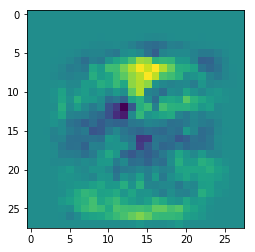

In [28]:
coef49 = SVM_model_49.coef_.reshape(28,28)
plt.imshow(coef49);

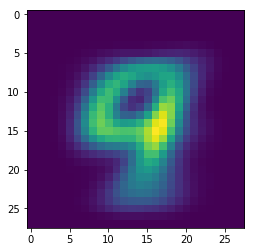

In [34]:
plt.imshow((np.mean(pixel49, axis=0)).reshape(28,28))

Interestingly, observing the confusion matrix, digit 4 and digit 9, digit 3 and digit 8, didgit 7 and digit 9, have a relatively high probability of 'confusing' the svm model. Taking digit 4 and digit 9 as an example, visualizing the weights of the model as an image, we can see the overlapping area (highest weights) which may possibly cause the confusion picked up by the model. 

In the last part of the exercise, I attempt to use three methods to optimizing model performance by tuning their respective hyperparameters. The two algorithms used are random forest, XGBoost with gridsearch. 

In [22]:
# Method 1 - Random Forest
# Trying different number of estimators for RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

n = np.arange(50, 300, 10)
rf_model_cv_scores = []

for sub_tree in tqdm(n):
    rf_model = RandomForestClassifier(n_estimators=sub_tree)
    
    cv_scores = cross_val_score(rf_model, x_train, y_train, cv = 5)
    
    rf_model_cv_scores.append(cv_scores)

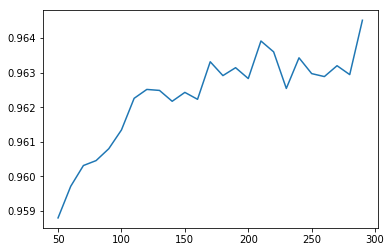

In [17]:
plt.plot(n, np.mean(rf_model_cv_scores, axis=1))

In [40]:
# Seems like the accuracy is still increasing, ran more tests for higher number of estimators for RandomForest

n = np.arange(300, 600, 50)
rf_model_scores = []

for sub_tree in tqdm(n):
    rf_model = RandomForestClassifier(n_estimators=sub_tree)
    rf_model.fit(x_train, y_train)
    
    rf_model_scores.append(rf_model.score(x_test, y_test))

C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\user\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A col

In [68]:
from sklearn.externals import joblib

# Save model
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

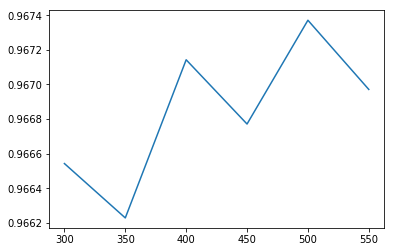

In [45]:
plt.plot(n, rf_model_scores)

In [43]:
# Due to computing constraints, the highest accuracy for RandomTree is 96.737 with n_estimator of 500 in this case
max(rf_model_scores)

0.9673714285714285

In [53]:
# Using smaller datasets to try out functions 

x1, x2, y1, y2 = train_test_split(x_train, y_train, train_size = .1)

C:\Users\user\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [54]:
# Second Model: XGBoost (trying with smaller dataset first, optimizing with smaller dataset, optimizing with 50% training data)

# 1. Using XG Boost alone using a smaller X_train data size of 5%
# Score = 91.019

from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(x1,y1)

print("XG Boost score: %3.3f" % (100 * XGB_model.score(x2,y2)))

C:\Users\user\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XG Boost score: 91.019


In [62]:
# 2. Optimizing XGBoost using Gridsearch, checking the max depth and learning rate parameters again with 5% of the train data
# Score = 92.8

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.svm import SVC

# Automatic Hyperparameter optimisation
XGB_model = GridSearchCV(
    XGBClassifier(),
    param_grid={
        'max_depth': [1, 3, 5, 7,],
        'learning_rate': [.1, .5, 1],
    },
    scoring=make_scorer(accuracy_score),
    cv=2,
    n_jobs=-1,
    verbose=10
)
XGB_model.fit(x1, y1)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed:  3.7min remaining:   44.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.1min finished
C:\Users\user\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 3, 5, 7], 'learning_rate': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=10)

In [63]:
XGB_model.score(x_test, y_test)

0.9282857142857143

In [66]:
XGB_model.best_params_

{'learning_rate': 0.5, 'max_depth': 3}

In [70]:
# Save model
joblib.dump(XGB_model, 'XGB.pkl')


['XGB.pkl']

In [77]:
# 3. Optimizing XGBoost again but with the entire training data (50% of all data)
# Score = 97.289

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.svm import SVC

# Automatic Hyperparameter optimisation
XGB_model = GridSearchCV(
    XGBClassifier(),
    param_grid={
        'max_depth': [1, 3, 5],
        'learning_rate': [0.05, .1, .5, 1],
    },
    scoring=make_scorer(accuracy_score),
    cv=2,
    n_jobs=-1,
    verbose=10
)
XGB_model.fit(x_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed: 34.7min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 40.7min finished
C:\Users\user\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 3, 5], 'learning_rate': [0.05, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=10)

In [78]:
XGB_model.score(x_test, y_test)

0.9728857142857142

In [79]:
XGB_model.best_params_

{'learning_rate': 0.5, 'max_depth': 5}

In [80]:
joblib.dump(XGB_model, 'XGB1_model.pkl')


['XGB1_model.pkl']

Due to limitations of computation time and power, I only achieved a highest accuracy of 97.3% in classifying the ten digits. However given that this is a image-recognition exercise, a convolutional neueral network approach may be more appropriate in this case, as the algorithm performs well in picking up nuansces which identifies an image. 